# Exploratory Data Analysis (EDA) for Credit Risk Modeling

**Objective:**  
Explore the transaction dataset to uncover patterns, identify data quality issues, and extract insights that will inform feature engineering for the credit risk model.

**Deliverables:**  
- Summary statistics for numerical and categorical features  
- Visualization of distributions and relationships  
- Missing value and outlier analysis  
- Top 3–5 insights for further modeling



In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


## Load Dataset
We load the raw transactions data to start our exploration.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df=pd.read_csv("../data/raw/data.csv")
# display first few rows
print(df.shape)
df.head()

(95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Data Overview
We check data types, missing values, and basic structure of the dataset.


In [7]:
# Check data types and info
df.info()

# Check missing values
df.isnull().sum()

# Summary statistics for numerical features
df.describe()

# Summary statistics for categorical features
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


## 8. Key Insights


## Numerical Features Distribution
We visualize the distribution of numeric columns (`Amount` and `Value`) to identify skewness and outliers.


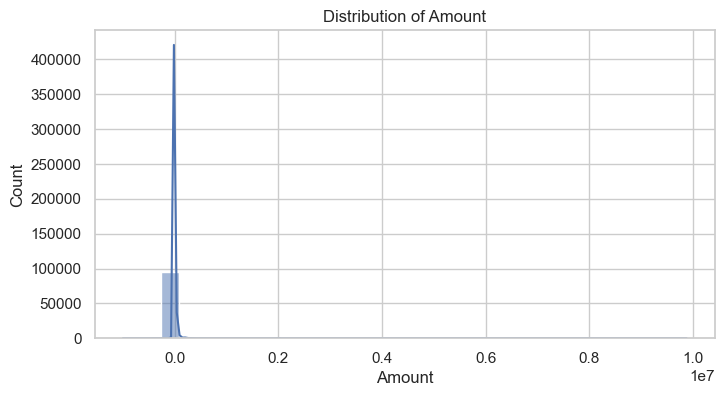

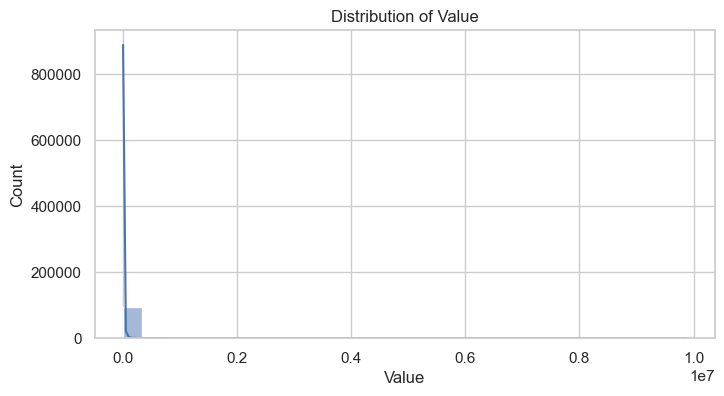

In [8]:
numerical_cols = ['Amount', 'Value']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()



## Categorical Features Distribution
Analyzing the distribution of key categorical features.


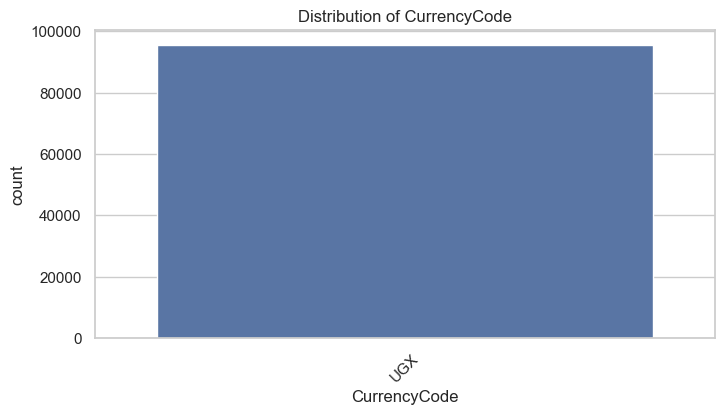

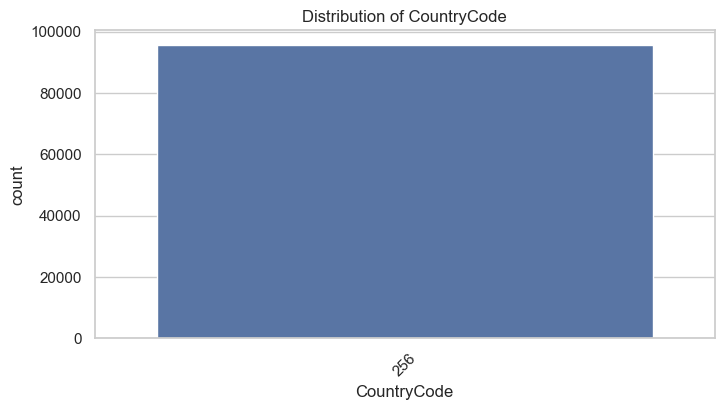

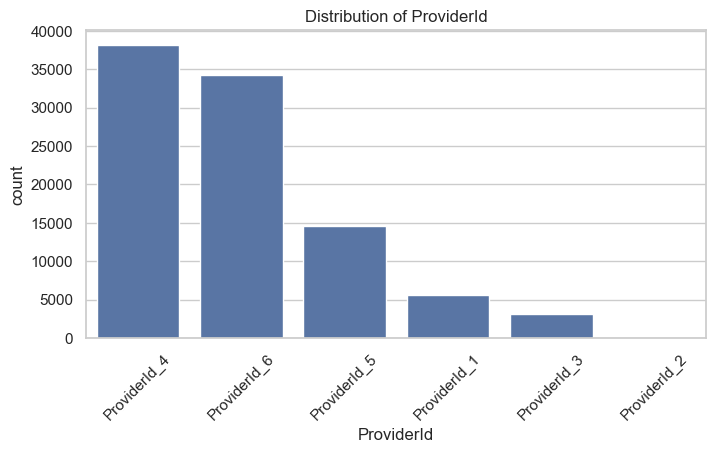

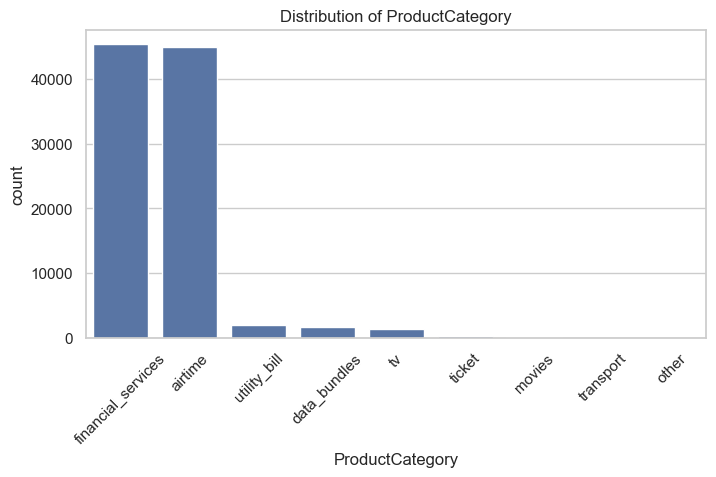

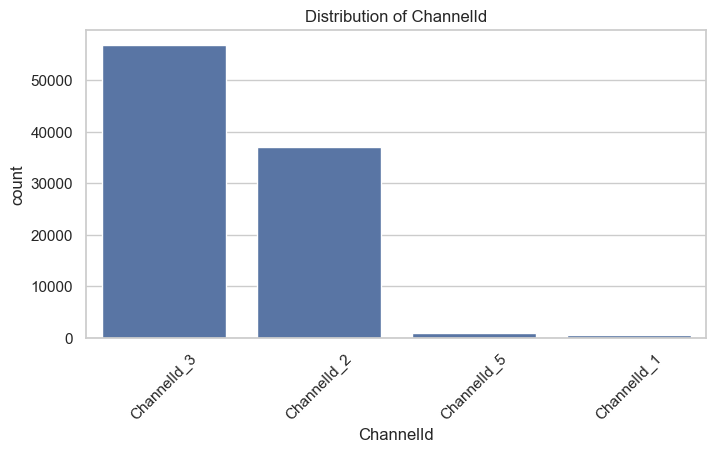

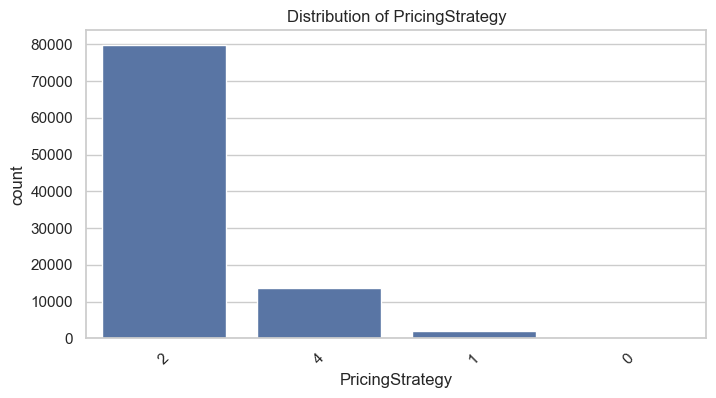

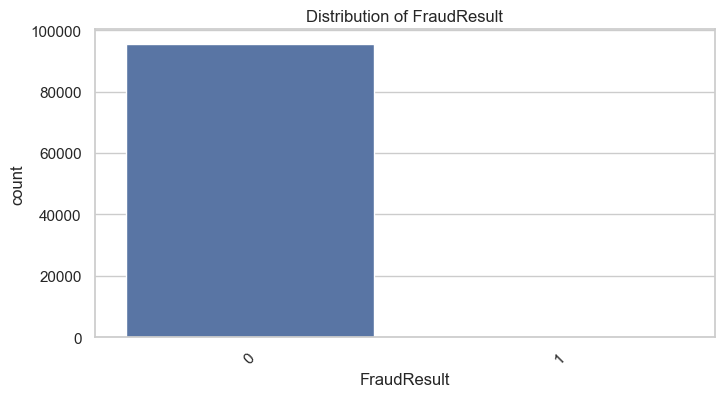

In [9]:
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 
                    'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


## Correlation Analysis
We analyze the relationship between numeric features to identify potential predictors for credit risk.


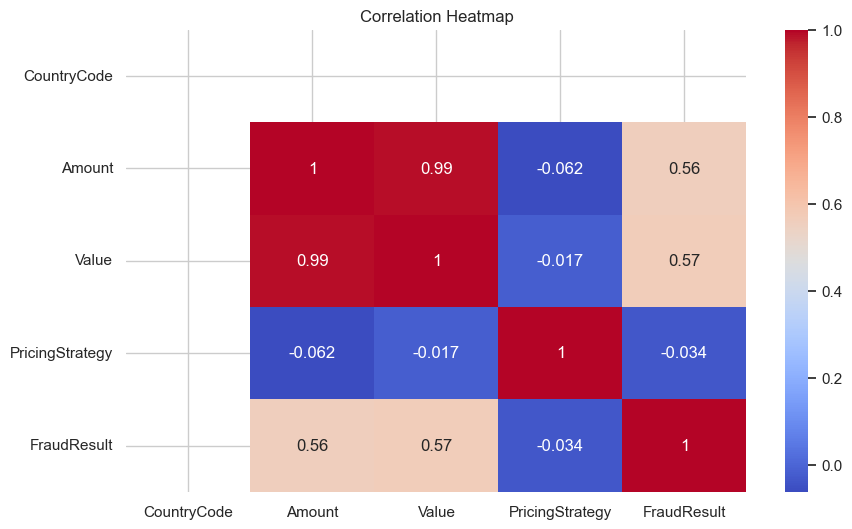

In [12]:

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## Outlier Detection
Boxplots are used to detect extreme values in numerical features.


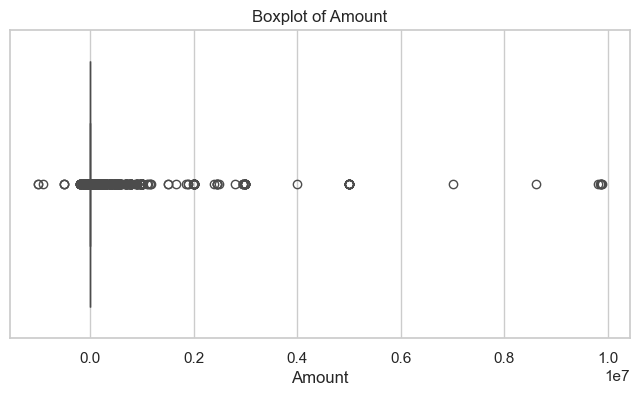

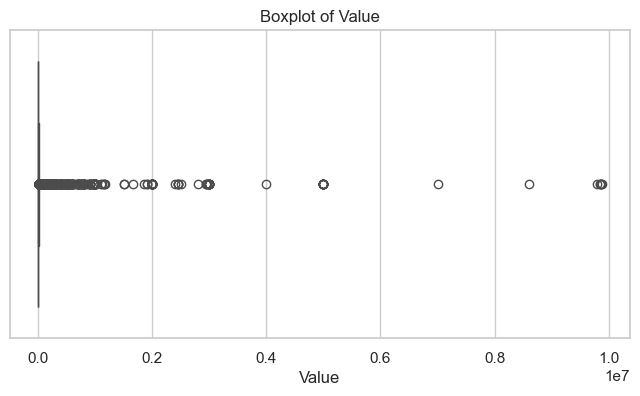

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Time-based Features
We extract hour, day, month, and weekday from the transaction timestamp to capture temporal patterns.


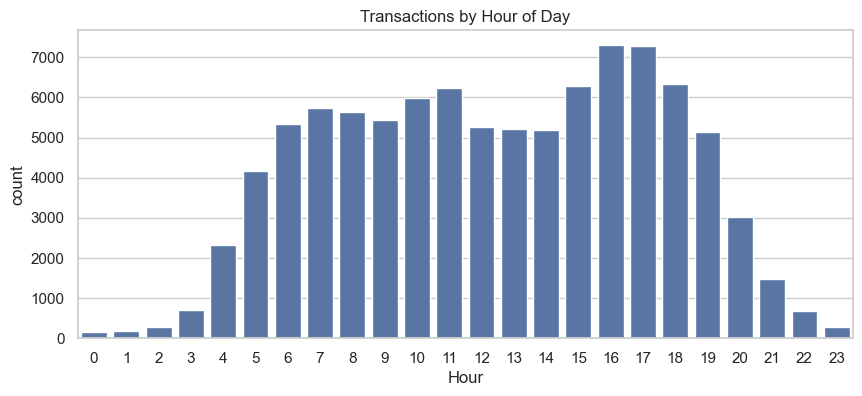

In [14]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['Hour'] = df['TransactionStartTime'].dt.hour
df['Day'] = df['TransactionStartTime'].dt.day
df['Month'] = df['TransactionStartTime'].dt.month
df['Weekday'] = df['TransactionStartTime'].dt.weekday

# Visualize transactions by hour
plt.figure(figsize=(10,4))
sns.countplot(x='Hour', data=df)
plt.title('Transactions by Hour of Day')
plt.show()


# Top 3–5 Insights from EDA

1. **Peak Transaction Hours:** Most transactions occur between 12 PM and 8 PM, which indicates peak engagement periods for users.
2. **Skewed Transaction Values:** `Amount` and `Value` are heavily right-skewed, suggesting a few customers contribute very high transaction amounts.
3. **RFM Relevance:** Customers with high frequency and high monetary value are likely to be low-risk, while those with low frequency and low monetary value may be high-risk.
4. **Category Imbalance:** Some product categories and channels dominate, which may affect model generalization if not properly encoded.
5. **Missing Values & Outliers:** Certain columns have missing values and extreme outliers, which must be handled during feature engineering.
